# Sarah Quesnelle, 53914140

## Research question/interests:

### Question 1:
**Has there been a significant change in average temperature (for the extreme temperature months January and July) for BC, Canada since the year 1917?**

### Question 2:
**Which Province (Station) has seen the greatest amount of snowfall in Canada since 1917? Is there a logical explanation for this amount of snowfall?**

### Question 3:
**Which Province recieves the greatest amount of rainfall in Canada? Is there a logical explanation for this amount of rainfall?**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import math
import sys
import os
import joypy
from pathlib import Path
sys.path.append("./code/")
import Project_Functions as ProFun
import glob
pd.options.display.float_format = '{:.1f}'.format
sns.set_theme(style = "white", font_scale = 1.2)

### Testing my Data Cleaning function:

In [4]:
# This cell will not run correctly on Github as this file is saved on my local computer.

# test = ProFun.DataClean("../../Canada/csv_canada_1923_8.CSV")
# test.head()

## Data Cleaning steps

The raw data that I use in this analysis can be found on data.world by the link here: [Canada Monthy Weather Data](https://data.world/pegarciadotcom/canada-monthly-weather-data-1917-2017-dataloversbrazil). I will not be uploading these raw csv files to Github to save on space as Github has a file size limit.

### Abbreviations and meanings of the column names in my cleaned datasets:

- Year = The year in which this data was collected. This value ranges from 1917 to 2017. These values has been extracted from the raw file name.
- Month = The month in which this data was collected. This value ranges from 1 to 12. These values has been extracted from the raw file name.
- Stn_Name = Station Name. A location within Canada
- Tm = Mean Temperature (°C). The average temperature that was recorded in the given month.
- Prov = An abbreviation of the Canadian Province/Territory
- S = Snowfall (cm). The total amount of snowfall recorded in the given month.
- P = Total Precipitation (mm). The total amount of rainfall recorded in the given month.

In [5]:
# This cell will not work properly on Github as 
# these raw files are saved on my local computer.

# merging the raw dataset files
# file_path = os.path.join("../../Canada/", "csv_canada_*.CSV")

# A list of all joined files is returned
# list_of_csv = glob.glob(file_path)

# Sending the merged dataset to my function file for cleaning
# dflist = []
# for file in list_of_csv:
#     df = ProFun.DataClean(file)
#     dflist.append(df)
# Candf = pd.concat(dflist)

# This sode will create a csv file of the data
# save_path = "../../../Data/CanadaData.csv"
# Candf.to_csv(save_path, index=False)

## Initial Data Analysis

In [6]:
# Reading a csv file from a zip compression
path = "../data/processed/CanadaData.zip"
Canada = pd.read_csv(path, compression="zip")

# Print the head of my dataframe
Canada.head()

,Year,Month,Stn_Name,Prov,Tm,S,P
0,1917,1,COWICHAN,BC,1.3,54.6,114.7
1,1917,1,COWICHAN BAY CHERRY POINT,BC,1.3,24.1,87.7
2,1917,1,JAMES ISLAND,BC,3.3,25.3,95.8
3,1917,1,METCHOSIN,BC,2.2,46.9,156.4
4,1917,1,MILNES LANDING,BC,2.4,16.5,127.8


In [7]:
Canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357283 entries, 0 to 1357282
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Year      1357283 non-null  int64  
 1   Month     1357283 non-null  int64  
 2   Stn_Name  1357283 non-null  object 
 3   Prov      1357283 non-null  object 
 4   Tm        1357283 non-null  float64
 5   S         1357283 non-null  float64
 6   P         1357283 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 72.5+ MB


In [8]:
Canada['P'] = pd.to_numeric(Canada['P'], errors='coerce')

Canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357283 entries, 0 to 1357282
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Year      1357283 non-null  int64  
 1   Month     1357283 non-null  int64  
 2   Stn_Name  1357283 non-null  object 
 3   Prov      1357283 non-null  object 
 4   Tm        1357283 non-null  float64
 5   S         1357283 non-null  float64
 6   P         1357182 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 72.5+ MB


In [9]:
Canada.describe(include=np.number)

,Year,Month,Tm,S,P
count,1357283.0,1357283.0,1357283.0,1357283.0,1357182.0
mean,1974.3,6.5,4.1,14.9,68.9
std,23.4,3.4,11.3,26.2,64.2
min,1917.0,1.0,-47.9,-3.0,0.0
25%,1960.0,4.0,-4.1,0.0,26.1
50%,1977.0,7.0,5.8,1.2,55.0
75%,1992.0,9.0,13.5,20.6,92.7
max,2017.0,12.0,26.9,725.9,997.9


In [10]:
Canada.describe(exclude=np.number)

,Stn_Name,Prov
count,1357283,1357283
unique,5668,14
top,WOODSTOCK,BC
freq,2276,268574


In [11]:
Canada[Canada['Stn_Name'] == 'WOODSTOCK'].groupby('Prov').count().reset_index()

,Prov,Year,Month,Stn_Name,Tm,S,P
0,NB,1078,1078,1078,1078,1078,1078
1,ON,1198,1198,1198,1198,1198,1198


In [13]:
Canada['Prov'].unique().tolist()

['BC',
 'YT',
 'NT',
 'AB',
 'SK',
 'MB',
 'ON',
 'QC',
 'NB',
 'NS',
 'PE',
 'NL',
 'NU',
 'XX']

- BC = British Columbia
- YT = Yukon
- NT = Northwest Territories
- AB = Alberta
- SK = Saskatchewan
- MB = Manitoba
- ON = Ontario
- QC = Quebec
- NB = New Brunswick
- NS = Nova Scotia
- PE = Prince Edward Island
- NL = Newfoundland and Labrador
- NU = Nunavut
- XX = Unknown

In [14]:
Canada['Month'].unique().tolist()

[1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
Canada['Year'].unique()

array([1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

### Analysis on data collected within BC, Canada.

In [16]:
BCdata = Canada[Canada['Prov'] == 'BC']

BCdata.head(5)

,Year,Month,Stn_Name,Prov,Tm,S,P
0,1917,1,COWICHAN,BC,1.3,54.6,114.7
1,1917,1,COWICHAN BAY CHERRY POINT,BC,1.3,24.1,87.7
2,1917,1,JAMES ISLAND,BC,3.3,25.3,95.8
3,1917,1,METCHOSIN,BC,2.2,46.9,156.4
4,1917,1,MILNES LANDING,BC,2.4,16.5,127.8


In [17]:
BCdata.describe()

,Year,Month,Tm,S,P
count,268574.0,268574.0,268574.0,268574.0,268474.0
mean,1975.4,6.5,6.8,13.8,92.5
std,24.3,3.5,8.1,32.5,106.7
min,1917.0,1.0,-37.5,0.0,0.0
25%,1960.0,3.0,1.9,0.0,27.2
50%,1979.0,6.0,7.4,0.0,54.4
75%,1993.0,9.0,13.3,13.3,114.2
max,2017.0,12.0,26.4,725.9,997.9


### Analysis on the Province 'XX'

In [18]:
XXdata = Canada[Canada['Prov'] == 'XX']
XXdata.head(5)

,Year,Month,Stn_Name,Prov,Tm,S,P
276013,1955,1,SOELLINGEN A GERMANY,XX,0.1,5.9,79.6
276014,1955,1,ZWEIBRUCKEN A GERMANY,XX,1.2,25.2,81.8
277007,1955,10,ZWEIBRUCKEN A GERMANY,XX,8.0,0.0,44.4
277977,1955,11,GROSTENQUIN A FRANCE,XX,4.5,0.0,23.8
277978,1955,11,MARVILLE A FRANCE,XX,5.3,0.0,27.9


In [19]:
XXdata.describe()

,Year,Month,Tm,S,P
count,1032.0,1032.0,1032.0,1032.0,1032.0
mean,1971.4,6.5,9.3,4.5,80.9
std,10.6,3.5,7.5,9.8,79.9
min,1955.0,1.0,-25.4,0.0,0.0
25%,1962.0,3.0,3.4,0.0,41.4
50%,1971.0,6.0,9.1,0.0,67.5
75%,1980.2,10.0,15.9,3.7,96.4
max,1991.0,12.0,23.9,70.3,798.9


In [20]:
# A list of the Stations with the label 'XX'
XXdata['Stn_Name'].unique().tolist()

['SOELLINGEN A GERMANY',
 'ZWEIBRUCKEN A GERMANY',
 'GROSTENQUIN A FRANCE',
 'MARVILLE A FRANCE',
 'LAHR A GERMANY',
 'BRANTRIDGE DOMINICA',
 'CAREY ISLANDS GREENLAND']

### Analysis on data collected within Kelowna, BC, Canada

In [21]:
Kelownadata = BCdata[BCdata['Stn_Name'].str.contains('KELOWNA')]
Kelownadata.head(5)

,Year,Month,Stn_Name,Prov,Tm,S,P
56,1917,1,KELOWNA,BC,-4.3,11.7,12.0
57,1917,1,KELOWNA BANKHEAD,BC,-4.5,11.8,11.8
426,1917,10,KELOWNA,BC,8.2,0.0,11.9
427,1917,10,KELOWNA BANKHEAD,BC,9.7,0.0,16.9
828,1917,11,KELOWNA,BC,5.0,0.0,8.9


In [22]:
# A list of Stations with BC, Canada that contain the string 'KELOWNA'
Kelownadata['Stn_Name'].unique().tolist()

['KELOWNA',
 'KELOWNA BANKHEAD',
 'KELOWNA CDA',
 'KELOWNA LAKEVIEW',
 'KELOWNA BOWES STREET',
 'KELOWNA A',
 'KELOWNA PC BURNETTS NURSERY',
 'KELOWNA DAV-SPIERS ROAD',
 'KELOWNA EAST',
 'KELOWNA N GLENMORE',
 'KELOWNA MWS0',
 'KELOWNA QUAILS GATE',
 'KELOWNA CEDARCREEK']

In [23]:
Kelownadata.describe(include=np.number)

,Year,Month,Tm,S,P
count,3067.0,3067.0,3067.0,3067.0,3067.0
mean,1975.0,6.5,8.7,7.0,27.7
std,26.8,3.4,8.3,14.0,18.5
min,1917.0,1.0,-18.0,0.0,0.0
25%,1956.0,3.5,1.5,0.0,14.1
50%,1982.0,6.0,8.5,0.0,23.8
75%,1997.0,9.0,16.1,7.6,37.6
max,2017.0,12.0,25.2,131.3,150.8


In [24]:
Kelownadata.describe(exclude=np.number)

,Stn_Name,Prov
count,3067,3067
unique,13,1
top,KELOWNA,BC
freq,548,3067


## Observations on Initial Analysis

- There are 13 Provinces in this dataset, 12 of which are valid Canadian Provinces. The 13th Province is labelled as "XX". There are 1032 data values with the Province 'XX' as a label.
- The province "XX" contain a list of stations that are outside of the Canadian border, which is likely a human error for combining temperature data of another Country to these raw datasets for Canada. I will remove these values from this dataset as they do not belong.
- There are 12 unique months in this dataset, which are numbered as:  
    - January = 1, February = 2, March = 3, April = 4, May = 5, June = 6, July = 7, August = 8, September = 9, October = 10, November = 11, December = 12.
- There are 101 unique years, which range from 1917 to 2017.
- There are 5668 unique Stations scattered around Canada.
    - The most popular station in Canada is Woodstock, Ontario with 1198 data collections for each numerical column.
    - Woodstock, New Brunswick has had 1078 data collections for each numerical column.
    - The most popular province for data collection is BC, with almost 270,000 values taken over the years for each numerical column.
    - Kelowna, BC and its immediate surrounding area has had a total of 3067 data collections for each numerical column over the given years.
- There is a extreme minimum average recorded temperature of -47.9 degrees Celsius for all of Canada, where the maximum average recorded temperature is 26.9 degrees Celsius.
- There seems to be a negative snowfall value, which does not make sense realistically. I should probably remove these values.
- The maximum snowfall on record is almost 726 centimeters, which equates out to 7.26 metres or 23.8 feet. This seems like an absurdly large amount of snowfall for a month, so I should analyze this value later on.
- Precipitation for any given month and any given location around Canada ranges from a minimum of 0 mm to a maximum of 998 mm. This max rainfall value also seems like a crazy outlier for a month.

### Removing invalid data, and saving the new dataframe inside of the processed folder.
- Negative Snowfall values in the column "S".
- The province "XX".

In [25]:
Canada_Data = Canada[Canada['Prov'] != 'XX']

Canada_Data = Canada_Data[Canada_Data['S'] >= 0]

# Confirming that the province 'XX' has been removed
Canada_Data['Prov'].unique().tolist()

['BC', 'YT', 'NT', 'AB', 'SK', 'MB', 'ON', 'QC', 'NB', 'NS', 'PE', 'NL', 'NU']

In [26]:
# Confirming there are no negative snowfall values
Canada_Data.describe(include=np.number)

,Year,Month,Tm,S,P
count,1356172.0,1356172.0,1356172.0,1356172.0,1356071.0
mean,1974.3,6.5,4.0,14.9,68.8
std,23.4,3.4,11.3,26.2,64.2
min,1917.0,1.0,-47.9,0.0,0.0
25%,1960.0,4.0,-4.1,0.0,26.1
50%,1977.0,7.0,5.8,1.2,55.0
75%,1992.0,9.0,13.5,20.6,92.7
max,2017.0,12.0,26.9,725.9,997.9


### My dataframe is now cleaned of all the errors that I could find

In [27]:
BCdata = Canada_Data[Canada_Data['Prov'] == 'BC']

BCdata.head(5)

,Year,Month,Stn_Name,Prov,Tm,S,P
0,1917,1,COWICHAN,BC,1.3,54.6,114.7
1,1917,1,COWICHAN BAY CHERRY POINT,BC,1.3,24.1,87.7
2,1917,1,JAMES ISLAND,BC,3.3,25.3,95.8
3,1917,1,METCHOSIN,BC,2.2,46.9,156.4
4,1917,1,MILNES LANDING,BC,2.4,16.5,127.8


## Exploratory Data Analysis for Question 1
**Has there been a significant change in average temperature (for the extreme temperature months January and July) for BC, Canada since the year 1917?**

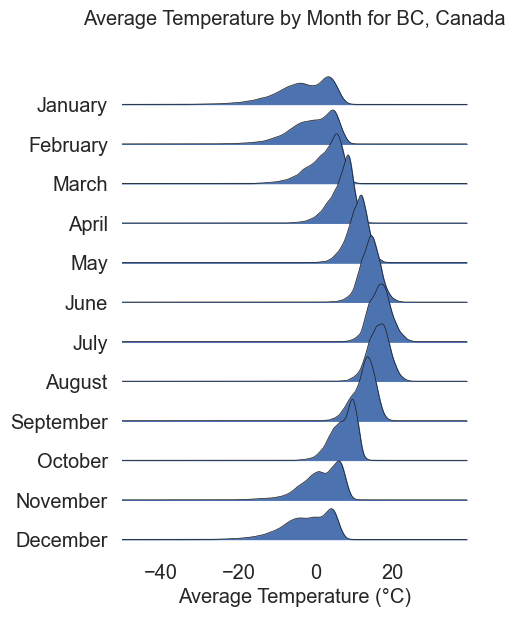

In [28]:
# Ridgeline plot of BCdata

fig, axes = joypy.joyplot(BCdata, by='Month', column='Tm', linewidth=0.5,
                          figsize=(5,6), overlap=0.5, labels = ['January',
                        'February', 'March', 'April', 'May', 'June', 'July', 'August',
                        'September', 'October', 'November', 'December'])
plt.xlabel("Average Temperature (°C)")
plt.title("Average Temperature by Month for BC, Canada")
sns.color_palette("colorblind")
plt.show()

### Average Temperature change for Canada during the months of July and January

In [36]:
July = Canada_Data[Canada_Data['Month'] == 7]
January = Canada_Data[Canada_Data['Month'] == 1]

print(f"Average temperature in Canada in July, 1917 is: \033[1m{July[July['Year'] == 1917]['Tm'].mean():.1f}°C\033[0;0m")
print(f"Average temperature in Canada in July, 2017 is: \033[1m{July[July['Year'] == 2017]['Tm'].mean():.1f}°C\033[0;0m")
print("\n")
print(f"Average temperature in Canada in January, 1917 is: \033[1m{January[January['Year'] == 1917]['Tm'].mean():.1f}°C\033[0;0m")
print(f"Average temperature in Canada in January, 2017 is: \033[1m{January[January['Year'] == 2017]['Tm'].mean():.1f}°C\033[0;0m")

Average temperature in Canada in July, 1917 is: 18.2°C
Average temperature in Canada in July, 2017 is: 18.3°C


Average temperature in Canada in January, 1917 is: -12.4°C
Average temperature in Canada in January, 2017 is: -6.5°C


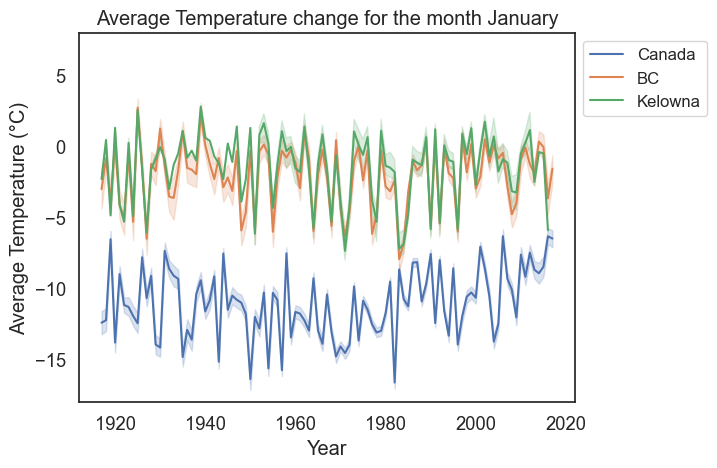

In [30]:
BC_January = BCdata[BCdata['Month'] == 12]
Kelowna_January = Kelownadata[Kelownadata['Month'] == 12]

sns.lineplot(x='Year', y='Tm', data=January, label='Canada')
sns.lineplot(x='Year', y='Tm', data=BC_January, label='BC')
sns.lineplot(x='Year', y='Tm', data=Kelowna_January, label='Kelowna')
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature change for the month January")
sns.color_palette("colorblind")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=12)
plt.ylim(-18,8)
plt.show()

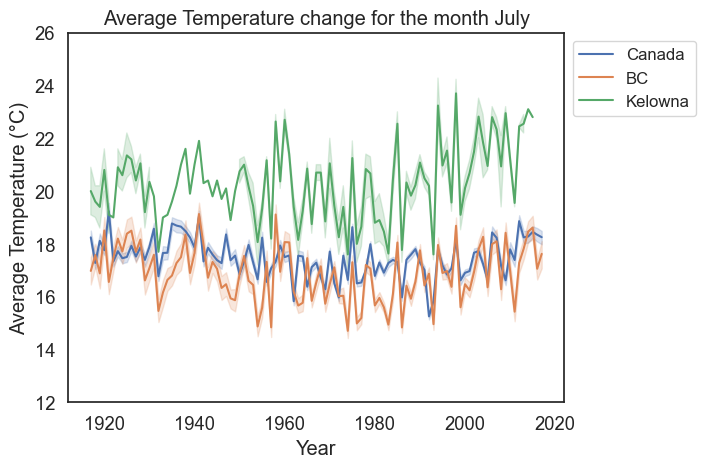

In [31]:
BC_July = BCdata[BCdata['Month'] == 7]
Kelowna_July = Kelownadata[Kelownadata['Month'] == 7]

sns.lineplot(x='Year', y='Tm', data=July, label='Canada')
sns.lineplot(x='Year', y='Tm', data=BC_July, label='BC')
sns.lineplot(x='Year', y='Tm', data=Kelowna_July, label='Kelowna')
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature change for the month July")
sns.color_palette("colorblind")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=12)
plt.ylim(12,26)
plt.show()

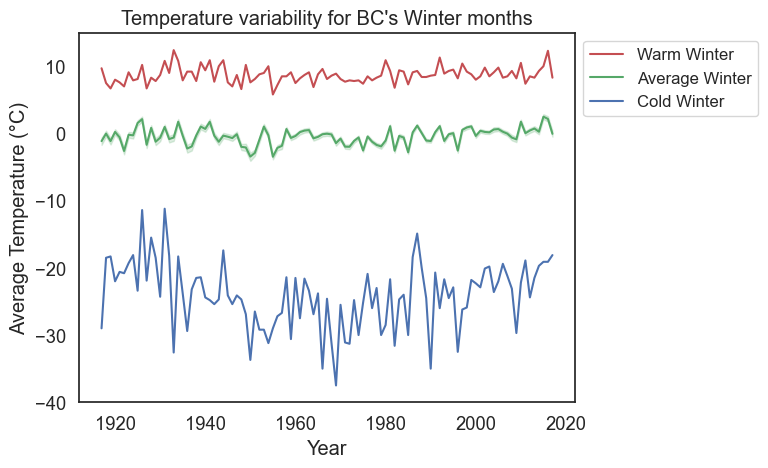

In [32]:
# I am defining the Winter months as from November to March
BC_Winter = BCdata[(BCdata['Month'] == 11) |
                    (BCdata['Month'] == 12) |
                    (BCdata['Month'] == 1) |
                    (BCdata['Month'] == 2) |
                    (BCdata['Month'] == 3) ]

# Plot for Warm Winter
Warm_BC_Winter = BC_Winter.groupby('Year').max().reset_index()
sns.lineplot(x='Year', y='Tm', data=Warm_BC_Winter, color='r', label='Warm Winter')

# Plot for Average Winter
sns.lineplot(x='Year', y='Tm', data=BC_Winter, color='g', label='Average Winter')

# Plot for Extremely Cold Winter
Extreme_BC_Winter = BC_Winter.groupby('Year').min().reset_index()
sns.lineplot(x='Year', y='Tm', data=Extreme_BC_Winter, color='b', label='Cold Winter')

plt.ylim(-40, 15)
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature variability for BC's Winter months")
sns.color_palette("colorblind")
plt.legend(loc=0, bbox_to_anchor=(1,1), fontsize=12)
plt.show()

In [33]:
BCdata[BCdata['Tm'] < -32]

,Year,Month,Stn_Name,Prov,Tm,S,P
93033,1933,12,FORT ST JOHN,BC,-32.6,103.0,103.0
222726,1950,1,SMITH RIVER A,BC,-33.7,22.7,22.7
430083,1966,1,FORT NELSON A,BC,-32.7,13.9,9.9
430084,1966,1,SMITH RIVER A,BC,-35.0,37.1,37.1
487187,1969,1,DAWSON CREEK A,BC,-32.3,23.8,23.8
487194,1969,1,FORT NELSON A,BC,-32.8,14.7,10.6
487196,1969,1,LOWER POST,BC,-37.5,15.4,15.4
487197,1969,1,SMITH RIVER A,BC,-36.2,13.2,13.0
972319,1990,2,SUMMIT LAKE,BC,-35.0,23.0,23.0
1093808,1996,1,COAL RIVER,BC,-32.5,50.0,50.0


- Above is a list of Stations within BC with extremely cold Winters, the average temperature of these locations being less than -32°C.
- The coldest Station on record is Lower Post, BC with a average temperature of -38°C for the year 1969.
- An interesting note is that my hometown; Fort Nelson, BC is on this list with an average temperature of -33°C for the years 1966 and 1969.

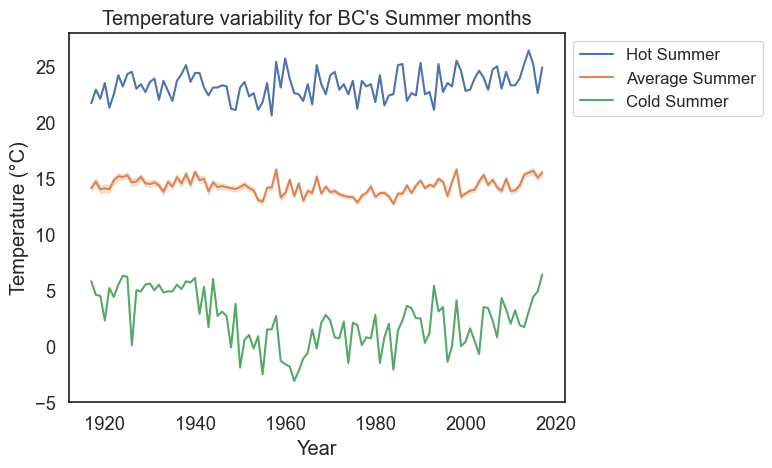

In [34]:
# I am defining the summer months as from May to September
BC_Summer = BCdata[(BCdata['Month'] == 5) |
                    (BCdata['Month'] == 6) |
                    (BCdata['Month'] == 7) |
                    (BCdata['Month'] == 8) |
                    (BCdata['Month'] == 9)]

# Plot for Hot Summer weather
Hot_BC_Summer = BC_Summer.groupby('Year').max().reset_index()
sns.lineplot(x='Year', y='Tm', data=Hot_BC_Summer, label='Hot Summer')

# Plot for Average Summer weather
sns.lineplot(x='Year', y='Tm', data=BC_Summer, label='Average Summer')

# Plot for Cold Summer weather
Cold_BC_Summer = BC_Summer.groupby('Year').min().reset_index()
sns.lineplot(x='Year', y='Tm', data=Cold_BC_Summer, label='Cold Summer')

plt.ylim(-7, 28)
plt.ylabel("Temperature (°C)")
plt.title("Temperature variability for BC's Summer months")
sns.color_palette("colorblind")
plt.legend(loc=0, bbox_to_anchor=(1,1), fontsize=12)
plt.ylim(-5,28)
plt.show()

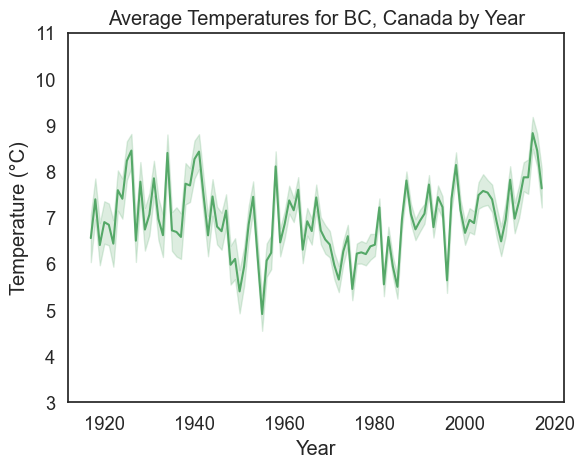

In [35]:
sns.lineplot(x='Year', y='Tm', data=BCdata, color='g')
plt.title('Average Temperatures for BC, Canada by Year')
plt.ylabel('Temperature (°C)')
plt.ylim(3, 11)
sns.color_palette("colorblind")
plt.show()

In [39]:
print(f"Kelowna Average Temperature in 1917 = \033[1m{Kelownadata[Kelownadata['Year'] == 1917]['Tm'].mean():.1f}°C\033[0;0m")
print(f"Kelowna Average Temperature in 2017 = \033[1m{Kelownadata[Kelownadata['Year'] == 2017]['Tm'].mean():.1f}°C\033[0;0m")

print(f"\nBC Average Temperature in 1917 = \033[1m{BCdata[BCdata['Year'] == 1917]['Tm'].mean():.1f}°C\033[0;0m")
print(f"BC Average Temperature in 2017 = \033[1m{BCdata[BCdata['Year'] == 2017]['Tm'].mean():.1f}°C\033[0;0m")

print(f"\nCanada Average Temperature in 1917 = \033[1m{Canada_Data[Canada_Data['Year'] == 1917]['Tm'].mean():.1f}°C\033[0;0m")
print(f"Canada Average Temperature in 2017 = \033[1m{Canada_Data[Canada_Data['Year'] == 2017]['Tm'].mean():.1f}°C\033[0;0m")

Kelowna Average Temperature in 1917 = 7.5°C
Kelowna Average Temperature in 2017 = 6.0°C

BC Average Temperature in 1917 = 6.6°C
BC Average Temperature in 2017 = 7.6°C

Canada Average Temperature in 1917 = 3.4°C
Canada Average Temperature in 2017 = 5.6°C


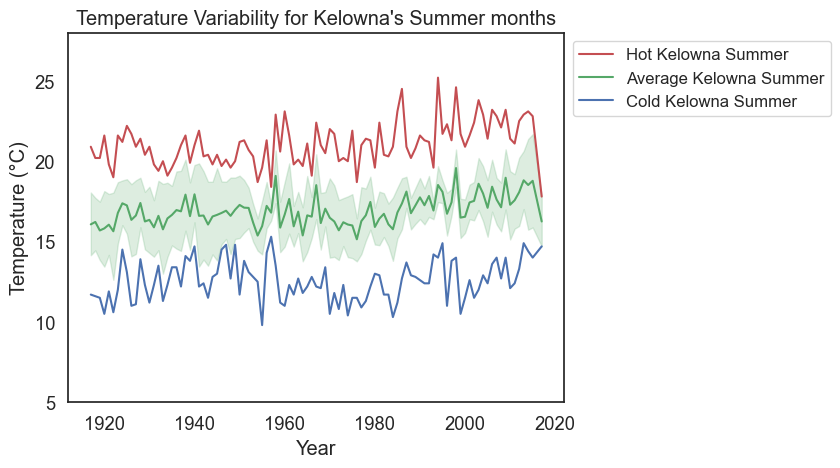

In [40]:
# I am defining the Summer months as from May to September
Kelowna_Summer = Kelownadata[(Kelownadata['Month'] == 5) |
                         (Kelownadata['Month'] == 6) |
                         (Kelownadata['Month'] == 7) |
                         (Kelownadata['Month'] == 8) |
                         (Kelownadata['Month'] == 9) ]

Hot_Kelowna_Summer = Kelowna_Summer.groupby('Year').max().reset_index()
sns.lineplot(x='Year', y='Tm', data=Hot_Kelowna_Summer, color="r", label='Hot Kelowna Summer')

sns.lineplot(x='Year', y='Tm', data=Kelowna_Summer, color="g", label='Average Kelowna Summer')

Cold_Kelowna_Summer = Kelowna_Summer.groupby('Year').min().reset_index()
sns.lineplot(x='Year', y='Tm', data=Cold_Kelowna_Summer, color="b", label='Cold Kelowna Summer')

plt.ylabel("Temperature (°C)")
plt.ylim(5,28)
plt.yticks(np.arange(5, 27, 5))
plt.title("Temperature Variability for Kelowna's Summer months")
plt.legend(loc=0, bbox_to_anchor=(1,1), fontsize=12)
sns.color_palette("colorblind")
plt.show()

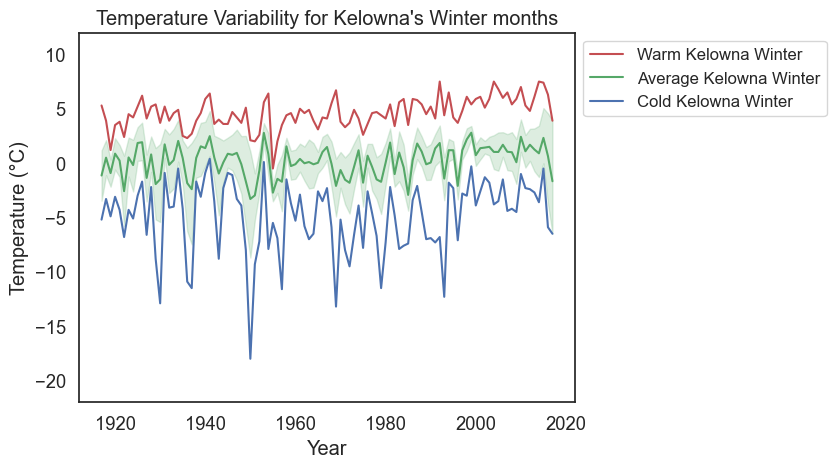

In [41]:
# I am defining the Winter months as from November to March
Kelowna_Winter = Kelownadata[(Kelownadata['Month'] == 11) |
                            (Kelownadata['Month'] == 12) |
                            (Kelownadata['Month'] == 1) |
                            (Kelownadata['Month'] == 2) |
                            (Kelownadata['Month'] == 3) ]

Warm_Kelowna_Winter = Kelowna_Winter.groupby('Year').max().reset_index()
sns.lineplot(x='Year', y='Tm', data=Warm_Kelowna_Winter, color="r", label='Warm Kelowna Winter')

sns.lineplot(x='Year', y='Tm', data=Kelowna_Winter, color="g", label = 'Average Kelowna Winter')

Cold_Kelowna_Winter = Kelowna_Winter.groupby('Year').min().reset_index()
sns.lineplot(x='Year', y='Tm', data=Cold_Kelowna_Winter, color="b", label='Cold Kelowna Winter')

plt.ylabel("Temperature (°C)")
plt.ylim(-22,12)
plt.yticks(np.arange(-20,11,5))
plt.title("Temperature Variability for Kelowna's Winter months")
plt.legend(loc=0, bbox_to_anchor=(1,1), fontsize=12)
sns.color_palette("colorblind")
plt.show()

In [42]:
# A list of Cold Winters for Kelowna
Kelownadata[Kelownadata['Tm'] < -12]

,Year,Month,Stn_Name,Prov,Tm,S,P
71861,1930,1,KELOWNA,BC,-12.9,42.7,42.7
71862,1930,1,KELOWNA BANKHEAD,BC,-12.4,36.7,36.7
222669,1950,1,KELOWNA,BC,-15.7,21.9,21.9
222670,1950,1,KELOWNA CDA,BC,-18.0,20.2,20.2
487101,1969,1,KELOWNA A,BC,-13.2,41.9,41.9
487103,1969,1,KELOWNA CDA,BC,-12.3,38.1,38.1
1033302,1993,1,KELOWNA LAKEVIEW,BC,-12.3,9.7,9.7


## Question 1 answer:
- January has seen an average temperature increase of 6.4°C from 1917 to 2017.
- July has seen an average temperature increase of 0.1°C from 1917 to 2017.  

**Therefore, I can say that there has been a significant change in average temperature for January with an increase of 6.4°C from 1917 to 2017, whereas the temperature change for July has stayed the same over the years.**

### Other interesting facts from my analysis on temperature change

- From these Graphs above, I notice there has been a greater variability in temperatures for the colder months.
- Canada is on average 2.2°C warmer in 2017 than it was in 1917.
- BC is on average 1°C warmer in 2017 than it was in 1917.
- An interesting fact I have found in this analysis is that the coldest station within BC is located next to the BC/Yukon border whereas the hottest station within BC is located next to the BC/Washington border which makes sense logically.
- The Winter months For Kelowna, BC show more variability in average temperatures than the Summer months. I can reasonably say that the temperature change looks to be more chaotic for the Winter months than it is for the Summer months.

## Exploratory Data Analysis for Question 2
**Which Province (Station) has seen the greatest amount of snowfall in Canada since 1917? Is there a logical explanation for this amount of snowfall?**

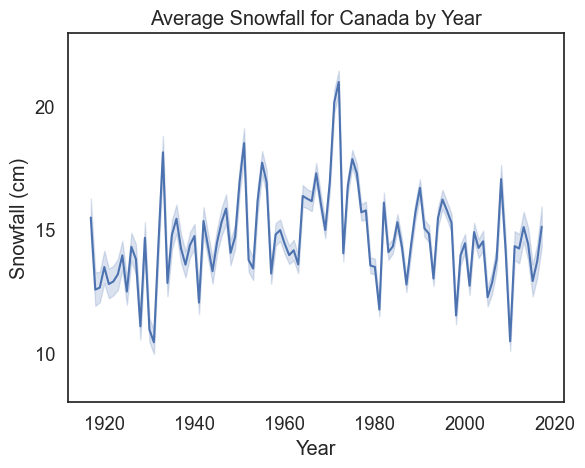

In [43]:
sns.lineplot(x='Year', y='S', data=Canada_Data, color="b")
plt.ylabel("Snowfall (cm)")
plt.title("Average Snowfall for Canada by Year")
plt.ylim(8,23)
plt.yticks(np.arange(10,21,5))
sns.color_palette("colorblind")
plt.show()

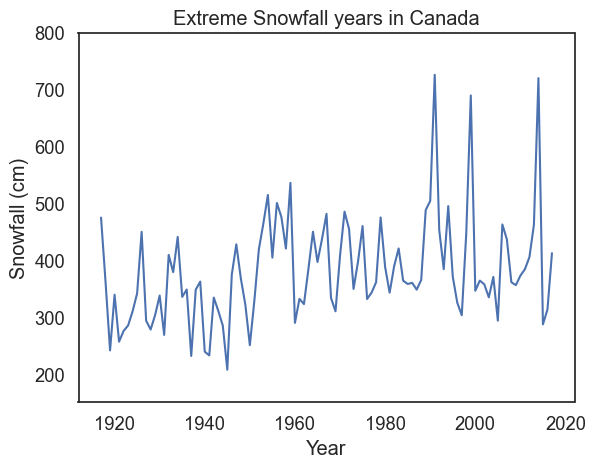

In [44]:
# A list of extreme values for Canada by Year
Canada_Max = Canada_Data.groupby('Year').max().reset_index()

# Graph for Extreme Snowfall values in Canada
sns.lineplot(x='Year', y='S', data=Canada_Max, color="b")
plt.ylabel("Snowfall (cm)")
plt.title("Extreme Snowfall years in Canada")
plt.ylim(150,800)
plt.yticks(np.arange(200, 801, 100))
sns.color_palette("colorblind")
plt.show()

In [45]:
Canada_Data[Canada_Data['S'] > 600]

# Johnny Mountain, BC recieved 725.9 cm of snow in December of 1991.
# Johnny Mountain is located in the Northern BC Rocky Mountain range.

# Virden Water, Manitoba was a close 2nd with 720 cm in February of 2014.
# Virden Water is located West of Lake Manitoba, near the Saskaskatchewan border.

,Year,Month,Stn_Name,Prov,Tm,S,P
993988,1991,12,JOHNNY MOUNTAIN,BC,-3.3,725.9,725.9
1152628,1999,2,MT WASHINGTON RESORT,BC,-3.8,689.5,689.5
1152629,1999,2,MT WASHINGTON UPPER,BC,-4.7,648.0,648.0
1335231,2014,1,VIRDEN WATER,MB,-15.3,607.0,607.0
1337459,2014,2,VIRDEN WATER,MB,-17.6,720.0,720.0


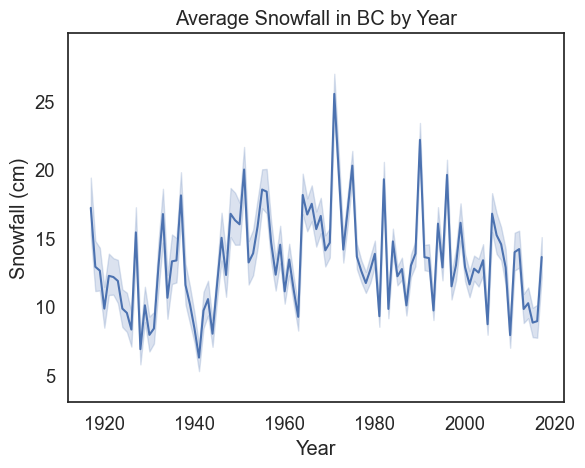

In [46]:
sns.lineplot(x='Year', y='S', data=BCdata, color="b")
plt.ylabel("Snowfall (cm)")
plt.title("Average Snowfall in BC by Year")
plt.ylim(3,30)
plt.yticks(np.arange(5,26,5))
sns.color_palette("colorblind")
plt.show()

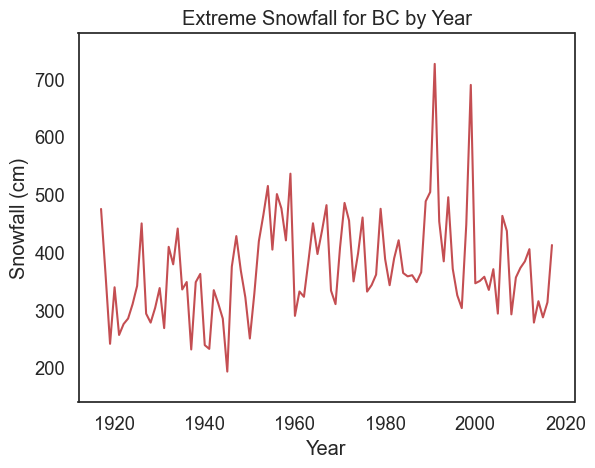

In [47]:
# Getting Maximum Snowfall values for BC
BC_Max = BCdata.groupby('Year').max().reset_index()
sns.lineplot(x='Year', y='S', data=BC_Max, color="r")

plt.ylabel("Snowfall (cm)")
plt.title("Extreme Snowfall for BC by Year")
plt.ylim(140,780)
plt.yticks(np.arange(200,750,100))
sns.color_palette("colorblind")
plt.show()

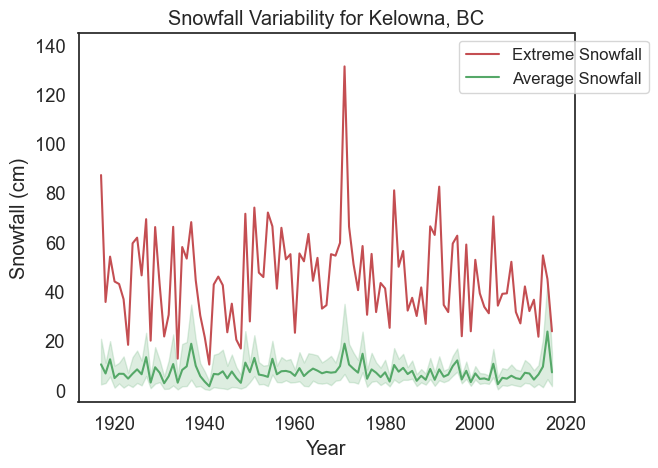

In [48]:
Kelowna_max = Kelownadata.groupby('Year').max().reset_index()
sns.lineplot(x='Year', y='S', data=Kelowna_max, color="r", label='Extreme Snowfall')

sns.lineplot(x='Year', y='S', data=Kelownadata, color="g", label='Average Snowfall')

plt.ylabel("Snowfall (cm)")
plt.title("Snowfall Variability for Kelowna, BC")
plt.ylim(-5,145)
plt.yticks(np.arange(0,141,20))
plt.legend(loc='upper left', bbox_to_anchor=(0.75,1), fontsize=12)
sns.color_palette("colorblind")
plt.show()

In [49]:
# A list of extreme snowfall values for Kelowna
# 72 cm = 6 feet of snowfall
# 120 cm = 10 feet of snowfall
Kelownadata[Kelownadata['S'] > 72]

,Year,Month,Stn_Name,Prov,Tm,S,P
1194,1917,12,KELOWNA,BC,-2.3,87.2,113.2
1195,1917,12,KELOWNA BANKHEAD,BC,-2.3,87.0,113.0
234680,1951,12,KELOWNA,BC,-5.4,74.0,77.3
532224,1971,12,KELOWNA A,BC,-8.0,131.3,86.4
532225,1971,12,KELOWNA PC BURNETTS NURSERY,BC,-6.7,128.6,128.6
777076,1982,1,KELOWNA A,BC,-4.8,72.4,61.9
777077,1982,1,KELOWNA EAST,BC,-4.6,81.0,81.0
1016391,1992,12,KELOWNA A,BC,-6.8,77.6,53.1
1016394,1992,12,KELOWNA LAKEVIEW,BC,-3.9,82.5,82.5


## Question 2 answer:
**The station that recieved the greatest amount of snowfall was Johnny Mountain, BC with a snowfall record of 726 cm in 1991.**

- From this graph above, on Extreme Snowfall, it appears that the amount of snowfall gets more extreme with time, is there an explanation for this?
- The 3 extreme values, as seen in the graph for extreme snowfall in Canada, are:  
    - Johnny Mountain, BC with 726 cm in 1991  
    - Virden Water, Manitoba with 720 cm in 2014  
    - Mt Washington Resort, BC with 690 cm in 1999  
- There is 1 crazy extreme snowfall value for Kelowna, BC with 131 cm (or 10 feet and 11 inches) for December of 1971. I was not able to find a news article for this extreme snowfall value. However I did find a website for [Kelowna Weather in 1971](https://www.extremeweatherwatch.com/cities/kelowna/year-1971), which does show that Kelowna did in fact recieve a whopping 131.3 cm of snowfall spread throughout the month December in 1971.

Yes, there is a logical explanation for why snowstorms have been getting more extreme as time passes. This news article, [Climate Change and Extreme Snow in the U.S.](https://www.ncei.noaa.gov/news/climate-change-and-extreme-snow-us#:~:text=Years%20with%20heavy%20seasonal%20snow%20and%20extreme%20snowstorms,United%20States%20has%20increased%20over%20the%20past%20century.), presents a fact that the severity of a storm is directly linked to the atmospheric temperature of where the storm originates. Therefore, we should expect, and prepare for, an increase in the frequency of snowfall world records as years pass.

## Exploratory Data Analysis for Question 3
**Which Province recieves the greatest amount of rainfall in Canada? Is there a logical explanation for this amount of rainfall?**

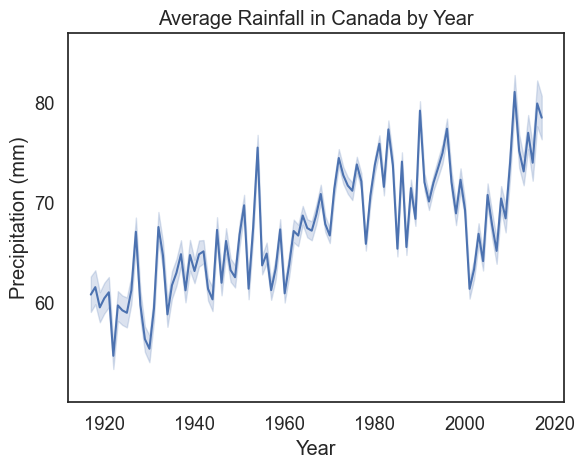

In [50]:
sns.lineplot(x='Year', y='P', data=Canada_Data)
plt.ylabel("Precipitation (mm)")
plt.title("Average Rainfall in Canada by Year")
plt.ylim(50, 87)
plt.yticks(np.arange(60, 81, 10))
sns.color_palette("colorblind")
plt.show()

- This graph above, for average rainfall in Canada, shows that the overall trend in average rainfall has only increased by about 20 mm over the 100 years.

In [51]:
print(f"The average rainfall for any given year in Canada is {Canada_Data['P'].mean():.0f} mm.")

The average rainfall for any given year in Canada is 69 mm.


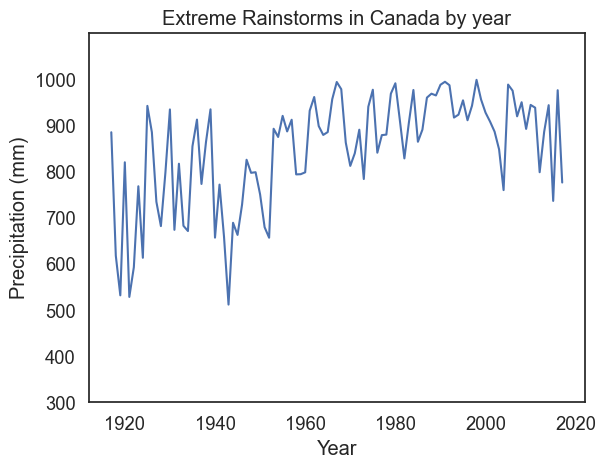

In [52]:
sns.lineplot(x='Year', y='P', data=Canada_Max, color="b")
plt.ylabel("Precipitation (mm)")
plt.title("Extreme Rainstorms in Canada by year")
plt.ylim(300,1100)
plt.yticks(np.arange(300, 1100, 100))
sns.color_palette("colorblind")
plt.show()

- The above graph shows that the extreme rainstorms in Canada have not significantly increased in precipitation amount over these 100 years.

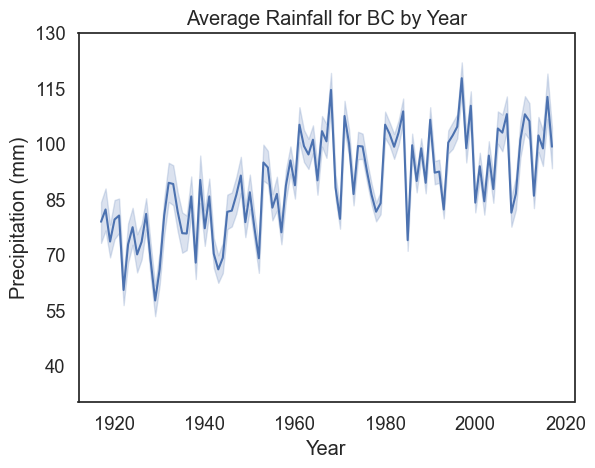

In [53]:
sns.lineplot(x='Year', y='P', data=BCdata, color='b')
plt.ylabel("Precipitation (mm)")
plt.title("Average Rainfall for BC by Year")
plt.ylim(30, 130)
plt.yticks(np.arange(40, 131, 15))
sns.color_palette("colorblind")
plt.show()

In [54]:
print(f"The average rainfall for any given year in BC is {BCdata['P'].mean():.0f} mm")

The average rainfall for any given year in BC is 92 mm


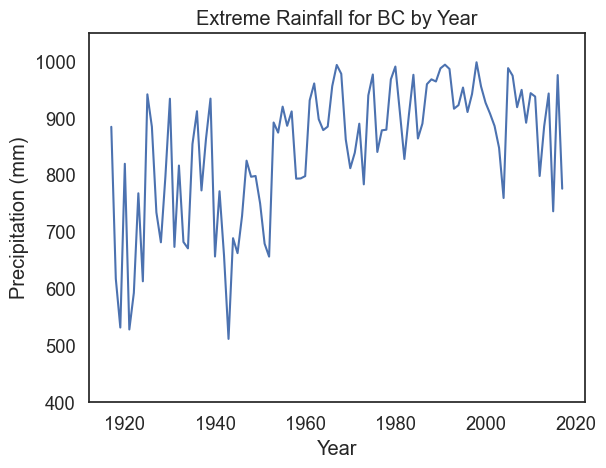

In [55]:
sns.lineplot(x='Year', y='P', data=BC_Max, color='b')
plt.ylabel("Precipitation (mm)")
plt.title("Extreme Rainfall for BC by Year")
plt.ylim(400, 1050)
plt.yticks(np.arange(400, 1001, 100))
sns.color_palette("colorblind")
plt.show()

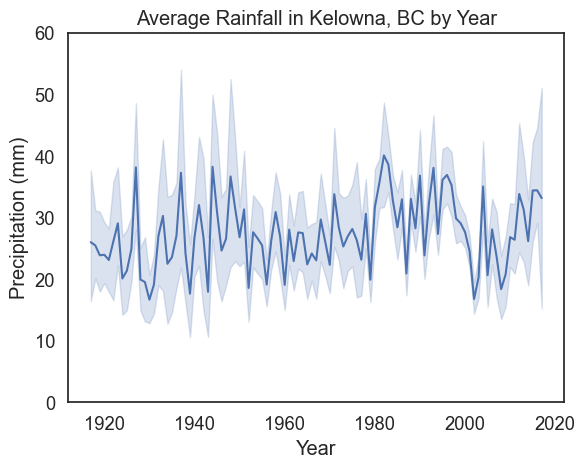

In [56]:
sns.lineplot(x='Year', y='P', data=Kelownadata, color='b')
plt.ylabel("Precipitation (mm)")
plt.title("Average Rainfall in Kelowna, BC by Year")
plt.ylim(0, 60)
sns.color_palette("colorblind")
plt.show()

In [57]:
print(f"The average rainfall for any given year in Kelowna, BC is {Kelownadata['P'].mean():.0f} mm")

The average rainfall for any given year in Kelowna, BC is 28 mm


In [58]:
# A list of Heavy Rain values for Canada
HeavyRain = Canada_Data[Canada_Data['P'] > 500]
HeavyRain

,Year,Month,Stn_Name,Prov,Tm,S,P
800,1917,11,ANYOX,BC,4.3,59.8,884.4
802,1917,11,MILL BAY,BC,5.6,17.8,669.7
803,1917,11,PRINCE RUPERT,BC,7.7,4.6,549.9
1158,1917,12,CLAYOQUOT,BC,5.5,0.0,512.1
1186,1917,12,NORTH NICOMEN,BC,2.0,104.7,539.3
...,...,...,...,...,...,...,...
1354572,2017,3,ZEBALLOS MURAUDE CREEK,BC,4.1,52.0,582.2
1354581,2017,3,BOAT BLUFF,BC,3.6,154.2,773.2
1354618,2017,3,N VAN SEYMOUR HATCHERY,BC,2.9,52.2,696.2
1355029,2017,4,N VAN SEYMOUR HATCHERY,BC,6.8,0.0,533.0


**Which station in Canada has recieved the greatest amount of rainfall in a month?**

In [59]:
Canada_Data[Canada_Data['P'] > 990]

,Year,Month,Stn_Name,Prov,Tm,S,P
448398,1967,1,BEAR CREEK,BC,1.7,56.3,991.5
449944,1967,10,KILDONAN FATTY BASIN,BC,11.9,0.0,993.2
736431,1980,12,OCEAN FALLS,BC,2.5,5.9,990.4
993679,1991,12,PALLANT CREEK,BC,5.8,5.5,993.7
1132593,1998,11,NITINAT RIVER HATCHERY,BC,7.0,0.0,997.9


In [60]:
# Which Provinces get the most rain?
HeavyRain['Prov'].unique().tolist()

['BC', 'NS', 'YT', 'MB']

- The provinces that are most likely to get constant rainstorms (where monthly rainfall > 500) are:  
    - BC, Yukon, Manitoba and Nova Scotia.

In [61]:
# Subset the data to remove any precipitation values of 0, 
# as there are a lot of zeros in the Precipitation column, 
# which are likely the winter months.
Canada_Rain = Canada_Data[Canada_Data['P'] > 0]

# Group this subset of data by Month, Year and Province to 
# see the averages for precipitation amount
Canada_Rain_Mean = Canada_Rain.groupby(['Year', 'Prov', 'Month']).mean().reset_index()

Canada_Rain_Mean

,Year,Prov,Month,Tm,S,P
0,1917,AB,1,-15.4,25.0,25.5
1,1917,AB,2,-15.0,14.7,15.2
2,1917,AB,3,-6.4,11.8,12.1
3,1917,AB,4,1.2,21.7,26.7
4,1917,AB,5,9.0,6.9,54.0
...,...,...,...,...,...,...
15682,2017,YT,8,15.5,0.0,34.4
15683,2017,YT,9,8.7,0.0,47.8
15684,2017,YT,10,-2.3,21.3,44.6
15685,2017,YT,11,-24.1,15.7,13.6


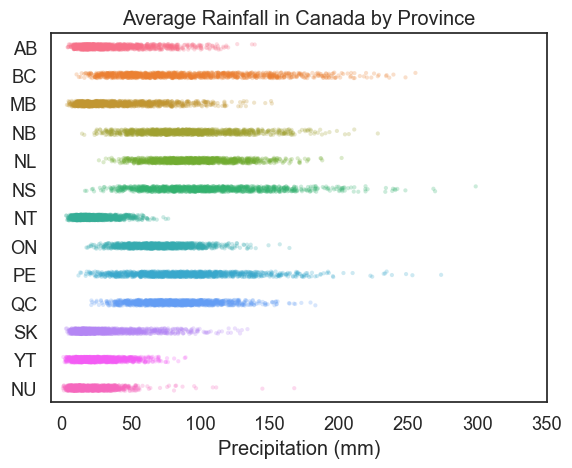

In [62]:
sns.stripplot(data=Canada_Rain_Mean, x='P', y='Prov', alpha=0.25, zorder=0, hue='Prov', legend=False, size=3)
plt.ylabel("")
plt.xlabel('Precipitation (mm)')
plt.title('Average Rainfall in Canada by Province')
sns.color_palette("colorblind")
plt.xlim(-8, 350)
plt.show()

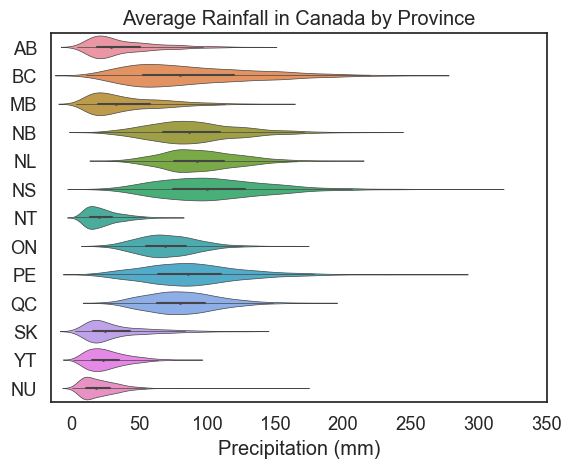

In [63]:
sns.violinplot(data=Canada_Rain_Mean, x='P', y='Prov', scale='width', linewidth=0.5, spanmode='hard')
plt.ylabel("")
plt.xlabel('Precipitation (mm)')
plt.title('Average Rainfall in Canada by Province')
sns.color_palette("colorblind")
plt.xlim(-15, 350)
plt.show()

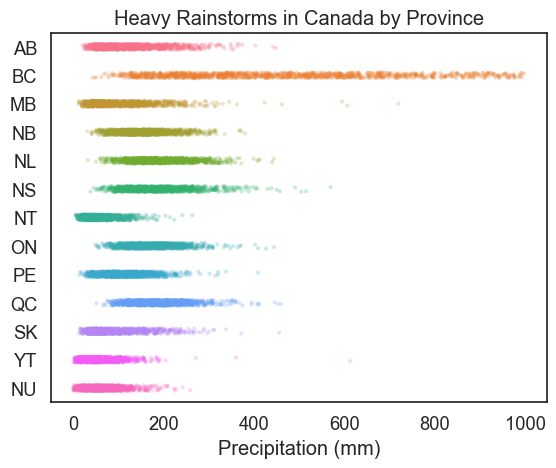

In [64]:
Canada_Rain_Max = Canada_Rain.groupby(['Month', 'Year', 'Prov']).max().reset_index()

sns.stripplot(data=Canada_Rain_Max, x='P', y='Prov', alpha=0.25, zorder=0, hue='Prov', legend=False, size=3)
plt.ylabel("")
plt.xlabel('Precipitation (mm)')
plt.title('Heavy Rainstorms in Canada by Province')
sns.color_palette("colorblind")
plt.show()

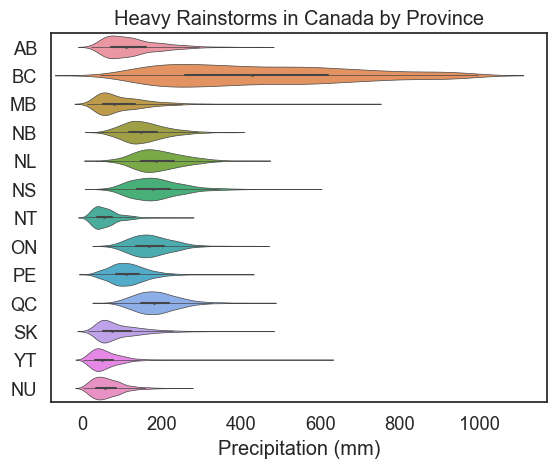

In [65]:
sns.violinplot(data=Canada_Rain_Max, x='P', y='Prov', scale='width', linewidth=0.5, spanmode='hard')
plt.ylabel("")
plt.xlabel('Precipitation (mm)')
plt.title('Heavy Rainstorms in Canada by Province')
sns.color_palette("colorblind")
plt.xlim(left=-80)
plt.show()

## Question 3 answer:
**Nova Scotia receives the highest average monthly rainfall of any province in Canada.  
However, BC recieves the heaviest rainstorms which also happens to far exceed the heavy rainstorms of other provinces.**
 
- Nitinat River, BC (which is located on Vancouver Island) recieved 998 mm of rainfall in November of 1998.
- The plots on Average Rainfall above shows that BC, Nova Scotia and Prince Edward Island are the provinces most likely to recieve a monthly rainfall of more than 250 mm 
- The plots on Heavy Rainstorms show that BC recieves significantly more heavy rainstorms (rainfall > 400 mm) than any other province.